 Problem Statement - EazyDiner is a table reservation platform for consumers looking for dining places. Will a new customer who signs up with us, make a booking in the first 7 days of signing up? If the probability is < 20% then keep it in a 0 bucket otherwise in a 1 bucket.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno
import scikitplot as skplt

In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=63e04540dda5d60410b3c038e5b5d2ed71a4c40fef003e2a39f68c5635d0f158
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing the datasets into data and data1
data = pd.read_excel('../input/eazydiner/EazyDiner_Sample_BOOKINGS_Dataset_1.xlsx')
data1 = pd.read_excel('../input/eazydiner/EazyDiner_Sample_CUSTOMER_Dataset_2.xlsx.xlsx')

In [4]:
data.head()

,date,medium,restaurant_name,location,cust_id
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123


In [5]:
data1.head()

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,M,32,google,2020-09-01


   Desciption of the Data in both the Dataframes

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61346 entries, 0 to 61345
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61346 non-null  datetime64[ns]
 1   medium           61346 non-null  object        
 2   restaurant_name  61346 non-null  object        
 3   location         61346 non-null  object        
 4   cust_id          61346 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98354 entries, 0 to 98353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cust_id      98354 non-null  int64         
 1   name         92756 non-null  object        
 2   city         80621 non-null  object        
 3   gender       4700 non-null   object        
 4   AGE          98354 non-null  int64         
 5   medium       98354 non-null  object        
 6   signup_date  98354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


Checking for the missing values



In [8]:
data.isnull().sum()

date               0
medium             0
restaurant_name    0
location           0
cust_id            0
dtype: int64

In [9]:
data1.isnull().sum()

cust_id            0
name            5598
city           17733
gender         93654
AGE                0
medium             0
signup_date        0
dtype: int64

<AxesSubplot:>

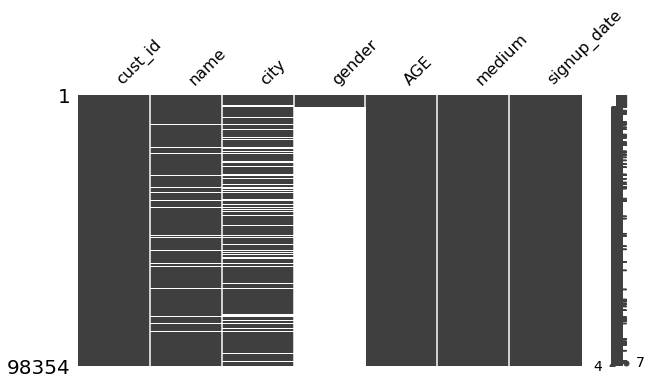

In [10]:
#Visulaising total number of missing values in each column of data1
missingno.matrix(data1,figsize=(10,5))


In [11]:
#Merging both the dataframes into 1 with the help of outer join on column cust_id
merged = pd.merge(left=data, right=data1, how='outer', left_on='cust_id', right_on='cust_id')

In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61346 non-null  datetime64[ns]
 1   medium_x         61346 non-null  object        
 2   restaurant_name  61346 non-null  object        
 3   location         61346 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4700 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


In [13]:
merged.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01


In [14]:
#98354 rows and 11 columns
merged.shape

(98354, 11)

In [15]:
#Checking for the duplicate rows
merged[merged.duplicated(subset=['cust_id'], keep='first')] 

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date


In [16]:
#Sorting in ascending order on the basis of cust_id column
merged.sort_values(by=['cust_id'], inplace=True)
merged.reset_index(drop=True, inplace=True)


In [17]:
merged.head(3)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01


In [18]:
#Missing values in merged 
merged.isnull().sum()


date               37008
medium_x           37008
restaurant_name    37008
location           37008
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64

<AxesSubplot:>

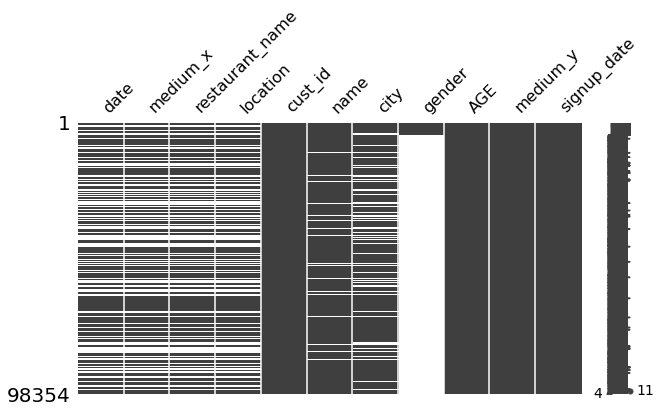

In [19]:
#Visulaising total number of missing values in each column of merged
missingno.matrix(merged,figsize=(10,5))

1) There are missing values in all the columns excluding 'cust_id', 'AGE', 'medium_y', 'signup_date'.

2) We can see that the number of missing values in gender column are very high, so we will drop the column, and for rest of the columns we will do some feature engineering to make new columns based on the given ones containing missing values.

3) The columns medium_x and medium_y are same for a particular customer, but some values are missing in medium_x so we can replace those missing values with the values in medium_y.

In [20]:
#Creating a new column medium which contains all the values in medium_x after filling missing values
merged['medium']= merged['medium_x'].fillna(merged['medium_y'])

In [21]:
#Creating a new column duration which will give us the number of days a customer has taken for booking based on the columns 'signup_date' and 'date'
from datetime import timedelta
merged['duration'] = merged['date']-merged['signup_date']
merged['duration'] = merged['duration']/timedelta(days=1)

In [22]:
merged.head(3)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3.0
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,NaN
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,NaN


Based on the 'duration' column we will create a new column 'Booked' which will denote whether a customer has done the booking within 7 days of signing up or not

In [23]:
#Allocating 0 where the duration exceeds 7 days and also when it has been found that the customer has not booked after signing up, else 1. 
merged['Booked']= np.where(merged['duration']>7,0, np.where(merged['duration'].isnull(), 0, 1))

1) We can now drop columns 'date' and 'signup_date' as we have already created 'duration' based on them.

2) Also we can drop the columns 'name' and 'cust_id' as they will not have a major impact on our output.

In [24]:
merged.head(2)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,Booked
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3.0,1
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,NaN,0


In [25]:
merged.isnull().sum()

date               37008
medium_x           37008
restaurant_name    37008
location           37008
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
medium                 0
duration           37008
Booked                 0
dtype: int64

1) We can see that the number of missing values in all the 3 columns 'restaurant_name', 'location' and 'duration' are same which makes sense because there are missing values in the 'duration' column for those customers who have not done booking after signing up and hence the restaurant_name and location will also be not there in the records for such customers and hence the value under column 'Booked' will be 0 for all of them.

2) So we can infer that these missing values are directly related to the 'Booked' column. So we need to take care of these missing values as we cannot directly drop them.

3) We cannot replace these missing values with the most frequent category as it will confuse the model, so we can create a new category for missing values in the columns 'restaurant_name' and 'location'.

4) For the column 'duration' we can fill the missing values with a number greater than 7 that is most frequent as we ought to have value as 0 in 'Booked' column for the duration to be null.

In [64]:
#Most frequent values of duration
merged['duration'].value_counts().head()

8    37549
0    30532
1    13571
2     4088
3     2310
Name: duration, dtype: int64

In [27]:
#Replacing null values with 8 in 'duration'.
merged['duration'] = merged['duration'].fillna(8).astype(int)

In [28]:
#Replacing null values in 'restaurant_name' with a new category 'restaurant_name_null'.
merged['restaurant_name'] = merged['restaurant_name'].fillna('restaurant_name_null')

In [29]:
#Replacing null values in 'location' with a new category 'location_null'.
merged['location'] = merged['location'].fillna('location_null')

In [30]:
merged.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,Booked
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3,1
1,NaT,NaN,restaurant_name_null,location_null,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,8,0
2,NaT,NaN,restaurant_name_null,location_null,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,8,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5,1
4,NaT,NaN,restaurant_name_null,location_null,5015431352120,Bharath,NaN,M,32,google,2020-09-01,google,8,0


In [31]:
merged.groupby(merged['city'].isnull()).Booked.value_counts().unstack('city')

city,False,True
Booked,,
0,25921.0,17733.0
1,54700.0,NaN


We can see from the above that all the missing values in city corresponds to the value 0 in 'Booked' column. So this is also a important feature. We can create here too a new category for all the missing values.

In [32]:
##Replacing null values in 'city' with a new category 'city_null'.
merged['city'] = merged['city'].fillna('city_null')

In [33]:
merged[merged['city']=='city_null'].head(3)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,Booked
4,NaT,NaN,restaurant_name_null,location_null,5015431352120,Bharath,city_null,M,32,google,2020-09-01,google,8,0
16,NaT,NaN,restaurant_name_null,location_null,5015431352140,NaN,city_null,M,40,android,2020-09-01,android,8,0
18,NaT,NaN,restaurant_name_null,location_null,5015431352142,NaN,city_null,M,18,android,2020-09-01,android,8,0


In [34]:
merged.isnull().sum()

date               37008
medium_x           37008
restaurant_name        0
location               0
cust_id                0
name                5598
city                   0
gender             93654
AGE                    0
medium_y               0
signup_date            0
medium                 0
duration               0
Booked                 0
dtype: int64

We have now taken care of all the missing values in the relevant columns which will be used in training the model.

In [35]:
#Total number of Bookings done
merged['Booked'].value_counts()

1    54700
0    43654
Name: Booked, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Booked', ylabel='count'>

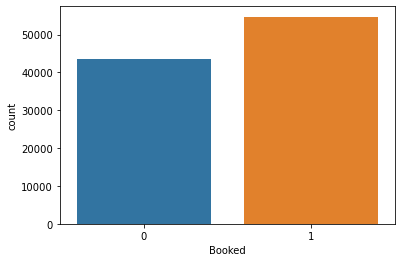

In [36]:
sns.countplot('Booked', data = merged)

<AxesSubplot:ylabel='AGE'>

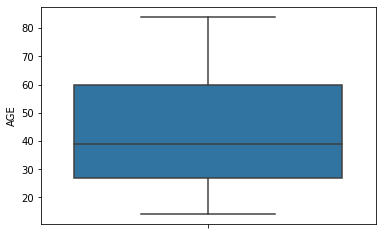

In [37]:
#Checking for outliers in 'AGE' column
sns.boxplot(y='AGE', data=merged)

No outliers are there 

In [38]:
#Checking for the number of unique values in all relevant categorical columns
cols = ['restaurant_name','location','city','medium']
for i in merged[cols]:
    print('Number of unique values in {} : {}'.format(i, len(merged[i].unique())))

Number of unique values in restaurant_name : 2314
Number of unique values in location : 1232
Number of unique values in city : 168
Number of unique values in medium : 6


1) We can see that there are very large number of unique categories in the columns 'restaurant_name', 'location', 'city' and hence after encoding the number of columns will increase by a large amount and this may introduce the curse of dimensionality.

2) To prevent this we will encode the top 50 frequent categories in each column which will decrease our number of columns and will also reduce time of computation and prevent the curse of dimensionality.

In [39]:
#Top 50 categories of restaurant_names
lst_1=merged.restaurant_name.value_counts().sort_values(ascending=False).head(50).index
lst_1=list(lst_1)
print(lst_1)

['restaurant_name_null', 'Barbeque Nation', "AB's - Absolute Barbecues", 'Byg Brewski Brewing Company', 'Mainland China', 'Runway1', "The Fisherman's Wharf", 'Flame & Grill', 'Barbeque nation', 'Sigree Global Grill', 'The G.T. Road', 'Uru Brewpark', 'Olive Bistro', '6 Ballygunge Place', 'BOA VILLAGE', 'JW Kitchen', 'Punjab Grill', 'Claw BBQ Crabshack & Grill', 'Farzi Cafe', 'Lord of the Drinks', 'Olive Bar & Kitchen', 'Oh! Calcutta', 'DRAMZ', 'The Big Barbeque', 'Bukhara', 'The Marketplace', "Chili's", 'Diablo', 'Jetlag', 'Brahma Brews', 'The Barbeque Company', 'Cafe Delhi Heights', 'Sigree', 'Gufha', 'The Caravan Menu', 'Little Italy', 'Communiti', ' Golconda Pavilion', 'Unplugged Courtyard', '27 Culinary Street', 'Jungle Jamboree', 'Arbor Brewing Company', 'Little Italy ', 'Local', 'Kipling Cafe', 'Sector 7 Social', "Berco's", 'The Tenth Floor', 'La Cabana', 'MKT']


In [40]:
#encoding the column 'restaurant_name'
for categories in lst_1:
    merged['r' + '_' + categories]=np.where(merged['restaurant_name']==categories,1,0)

In [41]:
#Top 50 categories of location
lst_2=merged.location.value_counts().sort_values(ascending=False).head(50).index
lst_2=list(lst_2)
print(lst_2)


['location_null', 'Connaught Place (CP), Central Delhi', 'Banjara Hills, Hyderabad', 'Patna', 'JP Nagar, South Bengaluru', 'Visakhapatnam', 'Indiranagar, East Bengaluru', 'Jubilee Hills, Hyderabad', 'Rajajinagar, West Bengaluru', 'Hennur, North Bengaluru', 'Mehrauli, South Delhi', 'Sector 26, Chandigarh', 'Guwahati', 'Vijayawada', 'Koramangala, South Bengaluru', 'Sarjapur Road, South Bengaluru', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Metro Walk Mall, Rohini', 'Trichy', 'Park Street Area, Kolkata', 'Kalyan Nagar, North Bengaluru', 'Gachibowli, Hyderabad', 'Nungambakkam, Chennai', 'Janakpuri, West Delhi', 'Madurai', 'Electronic City, South Bengaluru', 'Saket, South Delhi', 'Varanasi', 'BTM, South Bengaluru', 'Mysore', 'Velachery, Chennai', 'Inorbit Mall, Hitech City', 'T. Nagar, Chennai', 'Kothapet, Hyderabad', 'Ballygunge, Kolkata', 'Forum Sujana Mall, Kukatpally', 'Marathahalli, East Bengaluru', 'South City Mall, Prince Anwar Shah Road', 'Wakad, Pune', 'Ranchi', 'Sector 

In [42]:
#encoding the column 'location'
for category in lst_2:
    merged['L' + '_' + category]=np.where(merged['location']==category,1,0)
  

In [43]:
#Top 50 categories of city
lst_3=merged.city.value_counts().sort_values(ascending=False).head(50).index
lst_3=list(lst_3)
print(lst_3)

['city_null', 'Delhi NCR', 'Bengaluru', 'Hyderabad', 'Mumbai', 'Kolkata', 'Chennai', 'Pune', 'Chandigarh', 'Dubai', 'Patna', 'Goa', 'Jaipur', 'Visakhapatnam', 'Ahmedabad', 'Lucknow', 'Guwahati', 'Vijayawada', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Trichy', 'Ludhiana', 'Madurai', 'Varanasi', 'Mysore', 'Kanpur', 'Ranchi', 'Kochi', 'Salem', 'Vadodara', 'Kakinada', 'Thiruvananthapuram', 'Erode', 'Pondicherry', 'Guntur', 'Surat', 'Amritsar', 'Bareilly', 'Mangalore', 'Nagpur', 'Nellore', 'Jalandhar', 'Agra', 'Dehradun', 'Vellore', 'Jammu', 'Prayagraj', 'Kolhapur']


In [44]:
#encoding the column 'city'
for cat in lst_3:
    merged['C' + '_' + cat]=np.where(merged['city']==cat,1,0)
  

In [45]:
#encoding the column 'medium'
df = pd.get_dummies(merged['medium'],drop_first=True)

In [46]:
#Final Dataframe after encoding
merged_final = pd.concat([df,merged],axis=1)

In [47]:
merged_final.head()

,api_partner,concierge,google,ios,web,date,medium_x,restaurant_name,location,cust_id,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
0,0,0,0,0,1,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,NaT,NaN,restaurant_name_null,location_null,5015431352113,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,NaT,NaN,restaurant_name_null,location_null,5015431352114,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,NaT,NaN,restaurant_name_null,location_null,5015431352120,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Splitting the features and label column
cols = ['date','medium_x','restaurant_name','location','cust_id','city','name','gender','medium_y','signup_date','Booked','medium']
X = merged_final.drop(merged[cols],axis=1)
y = merged_final['Booked']

In [49]:
X.head(3)


,api_partner,concierge,google,ios,web,AGE,duration,r_restaurant_name_null,r_Barbeque Nation,r_AB's - Absolute Barbecues,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
0,0,0,0,0,1,72,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,45,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,29,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y.head(3)

0    1
1    0
2    0
Name: Booked, dtype: int64

In [51]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)



In [52]:
X_train.shape

(68847, 157)

In [53]:
X_test.shape

(29507, 157)

In [54]:
#Checking for balanced number of 2 categories in training set
y_train.value_counts()


1    38241
0    30606
Name: Booked, dtype: int64

In [55]:
##Checking for balanced number of 2 categories in training set
y_test.value_counts()

1    16459
0    13048
Name: Booked, dtype: int64

In [56]:
X_train.head()

,api_partner,concierge,google,ios,web,AGE,duration,r_restaurant_name_null,r_Barbeque Nation,r_AB's - Absolute Barbecues,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
55375,0,0,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8161,0,0,1,0,0,78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41310,0,0,1,0,0,69,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73316,0,0,1,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29710,0,0,1,0,0,30,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_test.head()

11392    1
67924    1
73104    1
18142    0
83526    1
Name: Booked, dtype: int64

In [58]:
#Deploying Random Forest Classifier on the training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

According to the problem statement , we need to put those customers in the bucket of 1 whose probability is greater than or equal to 20%, so we will set up a threshold of 0.2 on our predicted probabilities and classify accordingly.

In [59]:
prob_preds = classifier.predict_proba(X_test)
threshold = 0.2
y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]

In [60]:
#Creating a confusion matrix and printing the accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))


[[13034    14]
 [    0 16459]]
Accuracy : 0.9995255363134171


In [61]:
#Cross validation of the training set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 100)
print("Accuracy: {} ".format(accuracies.mean()))
print("Standard Deviation: {}".format(accuracies.std()))

Accuracy: 1.0 
Standard Deviation: 0.0


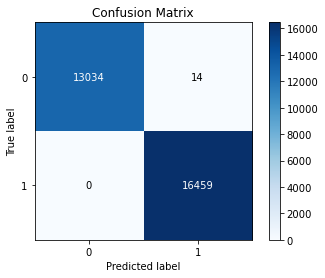

In [62]:
#Plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [63]:
#Classification report showing the precison, recall and f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13048
           1       1.00      1.00      1.00     16459

    accuracy                           1.00     29507
   macro avg       1.00      1.00      1.00     29507
weighted avg       1.00      1.00      1.00     29507



# Conclusion

Our Random Forest Model has been successful in predicting the values with an accuracy-score of 0.99 with 14 false positives and 0 false negatives and we can now predict using this model whether a new customer will book within 7 days of booking or not.